# Weight Usage Analyzer Demo
I wanted to try and test what this publication talks about : https://arxiv.org/abs/2307.02973

So In this notebook, we explore how a simple neural network trained on the Keras Wine dataset (yes, this dataset is used to classify the Italian wine one, ironic coming from someone born in Bordeaux🍷) uses its weights and how pruning and quantization impact its efficiency and its costs.

The toolkit we are gonna use **Weight Usage Analyzer** is available on my github (😏) : https://github.com/AngelLagr/weight-usage-analyser

---

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

import sys
import os
sys.path.append(os.path.abspath('..'))

from models.simple_model import *
from data.load_wine_dataset import load_wine_dataset
import core.weightusageanalyzer as wua

In [4]:
# Load and preprocess the breast cancer dataset
X_train, X_test, y_train, y_test = load_wine_dataset()

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3497 - loss: 1.2182 - val_accuracy: 0.3103 - val_loss: 1.0976
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3473 - loss: 1.0214 - val_accuracy: 0.3103 - val_loss: 0.9316
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2852 - loss: 0.9543 - val_accuracy: 0.3103 - val_loss: 0.7999
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3856 - loss: 0.8076 - val_accuracy: 0.3103 - val_loss: 0.6997
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4926 - loss: 0.6775 - val_accuracy: 0.3793 - val_loss: 0.6238
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4889 - loss: 0.6341 - val_accuracy: 0.4828 - val_loss: 0.5578
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5713 - loss: 0.5452 - val_accuracy: 0.5517 - val_loss: 0.5084
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6408 - loss: 0.4819 - val_accuracy: 0.6207 - val_loss: 0.466

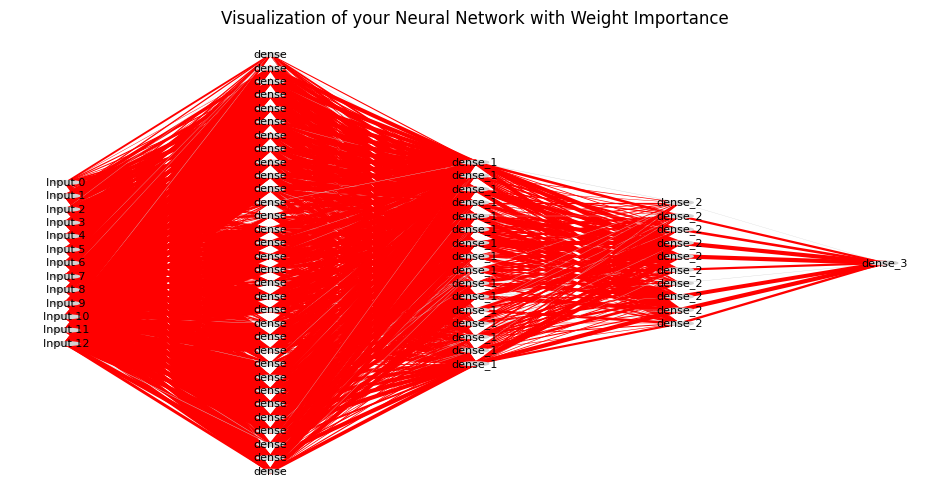


📊 Weight Usage Report:
Total number of weights: 416
Number of nodes (neurons): 32
Entropy (measure of uncertainty): 5.7453
Effective weights (active weights count): 312.7311
Contribution of top 90% of weights: 61.54%
Percentage of low weights (<1e-2): 0.24%

📊 Weight Usage Report:
Total number of weights: 512
Number of nodes (neurons): 16
Entropy (measure of uncertainty): 5.1569
Effective weights (active weights count): 173.6251
Contribution of top 90% of weights: 27.73%
Percentage of low weights (<1e-2): 11.72%

📊 Weight Usage Report:
Total number of weights: 160
Number of nodes (neurons): 10
Entropy (measure of uncertainty): 3.5947
Effective weights (active weights count): 36.4039
Contribution of top 90% of weights: 20.00%
Percentage of low weights (<1e-2): 16.25%

🧮 FLOPs Estimation:
 - Training (100 epochs, 142 samples): 64,042,000 operations
 - Inference (142 samples): 320,210 operations


In [ ]:
# Initialize and train the simple model
model = create_simple_model(input_shape=(X_train.shape[1],))
compile_model(model)
train_model(model, X_train, y_train, epochs=100, batch_size=16)

# Evaluate the model
model.evaluate(X_test, y_test)

# Visualize weight importance
wua.show(model, X_train)

# Generate and print weight usage report
importance_list = wua.compute_weight_importance(model, X_train)
for importance, weights, name in importance_list:
    report, normalized_importance = wua.generate_report(importance, weights)
    wua.print_report(report)

# Estimate and print FLOPs report
wua.print_flops_report(model, nb_epochs=100, dataset=X_train)

---
## Baseline model

The model reaches around **80% accuracy**, which is totally fine for a small neural net on a wine classification task 🍷

But here's the catch: it needs **~320,000 FLOPs per inference**, plus a decent chunk of memory. *

That got me thinking:  
💭 *What would this cost — in energy and money — if it scaled like models used in production today?*

---

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2677 - loss: 0.7283 - val_accuracy: 0.2414 - val_loss: 0.7658
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3682 - loss: 0.6400 - val_accuracy: 0.2759 - val_loss: 0.6867
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4374 - loss: 0.6012 - val_accuracy: 0.3103 - val_loss: 0.6263
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4997 - loss: 0.5283 - val_accuracy: 0.3103 - val_loss: 0.5725
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4437 - loss: 0.4878 - val_accuracy: 0.3448 - val_loss: 0.5147
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4394 - loss: 0.3891 - val_accuracy: 0.3793 - val_loss: 0.4538
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4907 - loss: 0.3525 - val_accuracy: 0.3793 - val_loss: 0.3781
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4295 - loss: 0.2644 - val_accuracy: 0.3793 - val_loss:

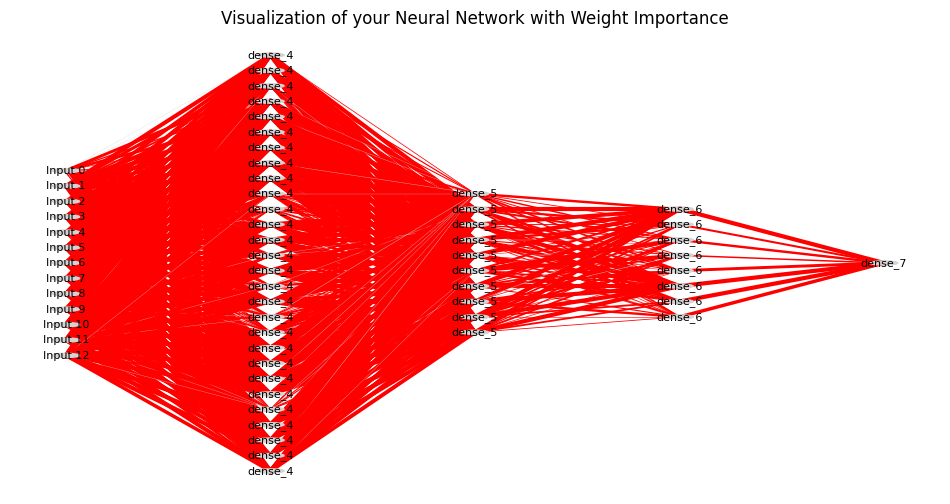


📊 Weight Usage Report:
Total number of weights: 364
Number of nodes (neurons): 28
Entropy (measure of uncertainty): 5.5294
Effective weights (active weights count): 252.0015
Contribution of top 90% of weights: 55.77%
Percentage of low weights (<1e-2): 0.82%

📊 Weight Usage Report:
Total number of weights: 280
Number of nodes (neurons): 10
Entropy (measure of uncertainty): 5.2629
Effective weights (active weights count): 193.0465
Contribution of top 90% of weights: 56.07%
Percentage of low weights (<1e-2): 3.93%

📊 Weight Usage Report:
Total number of weights: 80
Number of nodes (neurons): 8
Entropy (measure of uncertainty): 2.9024
Effective weights (active weights count): 18.2174
Contribution of top 90% of weights: 20.00%
Percentage of low weights (<1e-2): 25.00%

🧮 FLOPs Estimation:
 - Training (100 epochs, 142 samples): 42,912,400 operations
 - Inference (142 samples): 214,562 operations


In [6]:
newmodel = keras.Sequential()
newmodel.add(layers.Input(shape=(X_train.shape[1],)))
newmodel.add(layers.Dense(28, activation='relu'))
newmodel.add(layers.Dense(10, activation='relu'))
newmodel.add(layers.Dense(8, activation='relu'))

newmodel.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification


newmodel.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

newmodel.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

# Evaluate the model
newmodel.evaluate(X_test, y_test)

# Visualize weight importance
wua.show(newmodel, X_train)

# Generate and print weight usage report
importance_list = wua.compute_weight_importance(newmodel, X_train)
for importance, weights, name in importance_list:
    report, normalized_importance = wua.generate_report(importance, weights)
    wua.print_report(report)

# Estimate and print FLOPs report
wua.print_flops_report(newmodel, nb_epochs=100, dataset=X_train)

---
## ⚡ Energy & Cost Impact Study

Inspired by Amazon Search’s AWS Inferentia setup ([link](https://aws.amazon.com/fr/blogs/machine-learning/how-amazon-search-reduced-ml-inference-costs-by-85-with-aws-inferentia/)):

- 3,000 models  
- 10,000 inferences/second each  
- Running for 1 year → about **946 trillion inferences** (calculated as 3,000 × 10,000 × 365 × 24 × 3600 = 9.4608 × 10¹⁴)

---

### Original model (320,210 FLOPs per inference)

- Total FLOPs per year = 320,210 FLOPs × 9.4608 × 10¹⁴ inferences ≈ **3.0281 × 10²⁰ FLOPs**  
- Energy per FLOP = 3 × 10⁻¹⁵ kWh (source: [Horowitz, 2014](https://ieeexplore.ieee.org/document/6787015))  
- Total energy = 3.0281 × 10²⁰ × 3 × 10⁻¹⁵ = **908,430 kWh**  
- Average industrial electricity price in France ≈ 0.29 €/kWh (source: [Eurostat, 2025](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Electricity_price_statistics))  
- Electricity cost = 908,430 × 0.29 = **263,446 €**

---

### Pruned model (214,562 FLOPs per inference)

- Total FLOPs per year = 214,562 × 9.4608 × 10¹⁴ ≈ **2.0302 × 10²⁰ FLOPs**  
- Total energy = 2.0302 × 10²⁰ × 3 × 10⁻¹⁵ = **609,060 kWh**  
- Electricity cost = 609,060 × 0.29 = **176,627 €**

---

### 🔻 Annual Savings at Scale

| Metric                 | Amount Saved            |
|------------------------|------------------------|
| 🔋 Energy              | **~299,370 kWh**       |
| 💶 Electricity cost    | **~86,819 €**          |
| 🧮 FLOPs eliminated    | **~9.979 × 10¹⁹ FLOPs**|

That’s nearly **300 MWh** and **$87k** saved yearly by slimming down the model — with **no drop in accuracy**.

---

## Real-world impact

For context, the **908,000 kWh** consumed yearly by the original model is roughly the electricity use of **27 average French households** (average consumption including heating ≈ 33,000 kWh/year; source: [Ademe, 2023](https://www.ademe.fr)).

The pruned model consumes about **609,000 kWh**, which corresponds to around **18 French households**.

So pruning our model is a real thing and with small effort we can try to enhance the way be build ML models !

---

## Why Try Quantization? 🤔

Beyond the pruning we made thanks to wua, **quantization** is another powerful technique highlighted in the [publication](https://arxiv.org/abs/2307.02973). Quantization reduces the precision of model weights and activations (e.g., from 32-bit floats to 8-bit integers), which can dramatically shrink model size and speed up inference especially on edge devices or specialized hardware.

### Benefits:
- **Smaller model files:** As seen above, quantized models can be several times smaller than their float counterparts.
- **Faster inference:** Integer operations are much faster and more energy-efficient than floating-point math on most hardware.
- **Lower energy consumption:** Less computation and memory access means less power used great for both mobile devices and the planet.

### In the context of the publication:
The paper shows that combining pruning (removing unimportant weights) and quantization (using fewer bits per weight) can maximize efficiency **without sacrificing accuracy**. This is especially relevant for deploying models at scale, where every byte and FLOP counts.

Let's see how quantization impacts our model's size and accuracy in practice!

---

In [9]:
def predict_quantized_tflite(tflite_model_path, input_data):
    """
    Prédit la sortie d'un modèle TFLite quantifié à partir d'une ou plusieurs entrées.

    Args:
        tflite_model_path (str): Chemin du fichier .tflite
        input_data (np.ndarray): Entrée(s) de forme (n_samples, n_features)

    Returns:
        np.ndarray: Prédictions du modèle de forme (n_samples, ...)
    """
    # Charger le modèle TFLite
    interpreter = tf.lite.Interpreter(model_content=tflite_model_path)
    interpreter.allocate_tensors()

    # Détails sur les entrées/sorties
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    input_index = input_details[0]['index']
    output_index = output_details[0]['index']
    input_dtype = input_details[0]['dtype']
    input_shape = input_details[0]['shape']
    quant_params = input_details[0]['quantization']  # (scale, zero_point)

    # Forcer input_data à être un tableau 2D (n_samples, n_features)
    if input_data.ndim == 1:
        input_data = np.expand_dims(input_data, axis=0)

    n_samples = input_data.shape[0]
    results = []

    for i in range(n_samples):
        sample = input_data[i:i+1]  # garder la forme (1, n_features)

        # Appliquer la quantification si nécessaire
        if input_dtype == np.uint8 or input_dtype == np.int8:
            scale, zero_point = quant_params
            sample = (sample / scale + zero_point).astype(input_dtype)
        else:
            sample = sample.astype(input_dtype)

        interpreter.set_tensor(input_index, sample)
        interpreter.invoke()
        output = interpreter.get_tensor(output_index)
        results.append(output[0])  # on prend la prédiction unique
    return np.array(results)

def evaluate_quantized_tflite(tflite_model_path, X, y_true):
    """
    Évalue un modèle TFLite quantifié sur un ensemble d'exemples.

    Args:
        tflite_model_path (str): Chemin vers le modèle .tflite
        X (np.ndarray): Données d'entrée (batch)
        y_true (np.ndarray): Étiquettes vraies (batch)

    Returns:
        float: Accuracy (entre 0 et 1)
    """
    preds = predict_quantized_tflite(tflite_model_path, X)

    y_pred = np.round(preds).astype(int)  # Arrondir les prédictions pour la classification binaire
    y_pred = y_pred.flatten()  # Aplatir les prédictions pour la comparaison
    accuracy = np.mean(y_pred == y_true)
    return accuracy


In [10]:
# Exemple sur les poids de la première couche
weights = newmodel.layers[0].get_weights()[0]
min_range = float(weights.min())
max_range = float(weights.max())

quantized_weights = tf.quantization.quantize(
    weights, min_range, max_range, tf.qint8
)
converter = tf.lite.TFLiteConverter.from_keras_model(newmodel)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

accuracy = evaluate_quantized_tflite(
    tflite_quant_model, X_test, y_test
)

# Save the quantized model
tflite_model_path = 'notebook_files/quantized_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_quant_model)

# Save newmodel
newmodel_path = 'notebook_files/newmodel.keras'
newmodel.save(newmodel_path)

# compare their size
original_size = os.path.getsize(newmodel_path)
quantized_size = os.path.getsize(tflite_model_path)
print(f"Original model size: {original_size / 1024:.2f} KB")
print(f"Quantized model size: {quantized_size / 1024:.2f} KB")

print("Quantized model accuracy:", accuracy)





Saved artifact at 'C:\Users\lagra\AppData\Local\Temp\tmp4cnt7em6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 13), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2967854200112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2967983095152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2967983094272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2967983090752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2969357785344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2969358433824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2967982586368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2967982578624: TensorSpec(shape=(), dtype=tf.resource, name=None)
Original model size: 38.70 KB
Quantized model size: 5.43 KB
Quantized model accuracy: 0.7777777777777778


c:\Users\lagra\miniconda3\envs\wua\lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


---

The model is 8 times lighter and the accuracy is still the same !

---

In [22]:
import time
instance = X_test[0:1]
start_time = time.time()
predictions = predict_quantized_tflite(tflite_quant_model, instance)
end_time = time.time()

print(f"Prediction time for quantized model: {end_time - start_time:.6f} seconds")

start_time = time.time()
predictions = newmodel.predict(instance, verbose=0)
end_time = time.time()

print(f"Prediction time for original model: {end_time - start_time:.6f} seconds")


Prediction time for quantized model: 0.001545 seconds
Prediction time for original model: 0.066829 seconds


---

The results are clear !

The quantized models is ~50 times faster that the other model ! The computation cost of one FLOPS is lighter (and so : cheaper !)

---

## Final thoughts

With billions of inferences made daily worldwide, squeezing out every bit of efficiency — fewer FLOPs, less memory, smaller binaries — adds up to a big impact.

🌍 Optimizing AI models might seem like a tiny step, but it’s a giant leap for greener technology.

---

*Obviously, my little model won’t get called billions of times like Amazon’s beast. But since most current models are much bigger, the real-world energy footprint is often worse.*